Beata Sirowy

# Bayes therorem in practice: distributions

Based on: Downey, A. (2021) _Think Bayes_

In this tutorial we’ll use Pmf objects ( a “__probability mass function__”) from __empiricaldist__ module to solve some more challenging problems and take one more step toward Bayesian statistics. 


We use Pmf to represent a set of hypotheses and their probabilities.

empiricaldist is based on pandas; the Pmf class inherits from the pandas
Series class and provides additional features specific to probability mass
functions. 
-  Pmf and other classes from empiricaldist simplify the code and make it more readable.

### Distributions
In statistics a distribution is a set of possible outcomes and their corresponding
probabilities. 
- For example, if you toss a coin, there are two possible outcomes
with approximately equal probability. If you roll a 6-sided die, the set of possible
outcomes is the numbers 1 to 6, and the probability associated with each
outcome is 1/6.
- To represent distributions, we’ll use a library called empiricaldist. An
“empirical” distribution is based on data, as opposed to a theoretical distribution.

### Probability Mass Functions
If the outcomes in a distribution are discrete, we can describe the distribution
with a probability mass function, or PMF, which is a function that maps from
each possible outcome to its probability.

- empiricaldist provides a class called Pmf that represents a probability
mass function.

In [1]:
from empiricaldist import Pmf

coin = Pmf()
coin['heads'] = 1/2
coin['tails'] = 1/2
coin

,probs
heads,0.5
tails,0.5


Pmf creates an empty Pmf with no outcomes. Then we can add new outcomes
using the bracket operator. In this example, the two outcomes are represented
with strings, and they have the same probability, 0.5.

- You can also make a Pmf from a sequence of possible outcomes.
The following example uses Pmf.from_seq to make a Pmf that represents a
6-sided die.

In [2]:
die = Pmf.from_seq([1,2,3,4,5,6])
die

,probs
1,0.166667
2,0.166667
3,0.166667
4,0.166667
5,0.166667
6,0.166667


In this example, all outcomes in the sequence appear once, so they all have the
same probability,

More generally, outcomes can appear more than once, as in the following
example:

In [4]:
letters = Pmf.from_seq(list('Alabama'))
letters

,probs
A,0.142857
a,0.428571
b,0.142857
l,0.142857
m,0.142857


The Pmf class inherits from a pandas Series, so anything you can do with a
Series, you can also do with a Pmf.
- For example, you can use the bracket operator to look up a quantity and get the
corresponding probability:


In [6]:
letters["l"]

np.float64(0.14285714285714285)

In [5]:
letters[2:5]

b    0.142857
l    0.142857
m    0.142857
Name: , dtype: float64

In [7]:
die([1,4,7])

array([0.16666667, 0.16666667, 0.        ])

The quantities in a Pmf can be strings, numbers, or any other type that can be
stored in the index of a pandas Series.

### The Cookie Problem Revisited

We’ll use a Pmf to solve the Cookie Problem: 

_Suppose there are two bowls of cookies.
Bowl 1 contains 30 vanilla cookies and 10 chocolate cookies.
Bowl 2 contains 20 vanilla cookies and 20 chocolate cookies.
Now suppose you choose one of the bowls at random and, without looking,
choose a cookie at random. If the cookie is vanilla, what is the probability that
it came from Bowl 1?_

Here’s a Pmf that represents the two hypotheses and their prior probabilities:


In [2]:
prior = Pmf.from_seq(['Bowl 1', 'Bowl 2'])
prior

,probs
Bowl 1,0.5
Bowl 2,0.5


This distribution, which contains the prior probability for each hypothesis, is
called __the prior distribution__.

To update the distribution based on new data (the vanilla cookie), we multiply
the priors by the likelihoods. 
- The likelihood of drawing a vanilla cookie from
Bowl 1 is 3/4 and the likelihood for Bowl 2 is 1/2.

In [3]:
likelihood_vanilla = [0.75, 0.5]
posterior = prior * likelihood_vanilla
posterior

,probs
Bowl 1,0.375
Bowl 2,0.250


The result is the unnormalized posteriors; that is, they don’t add up to 1. To
make them add up to 1, we can use normalize, which is a method provided
by Pmf:

In [4]:
posterior.normalize()

np.float64(0.625)

In [5]:
posterior

,probs
Bowl 1,0.6
Bowl 2,0.4


The return value from normalize is the total probability of the data, which is
posterior, which contains the posterior probability for each hypothesis - __the posterior distribution__.

From the posterior distribution we can select the posterior probability for Bowl
1, which is the final answer:

In [6]:
posterior('Bowl 1')

np.float64(0.6)

One benefit of using Pmf objects is that it is easy to do successive updates with
more data. For example, suppose you put the first cookie back (so the contents of
the bowls don’t change) and draw again from the same bowl. If the second
cookie is also vanilla, we can do a second update like this:

In [7]:
posterior *= likelihood_vanilla
posterior.normalize()
posterior

,probs
Bowl 1,0.692308
Bowl 2,0.307692


Now the posterior probability for Bowl 1 is almost 70%.

But suppose we do the
same thing again and get a chocolate cookie.
Here are the likelihoods for the new data:

In [8]:
likelihood_chocolate = [0.25, 0.5]

In [9]:
posterior *= likelihood_chocolate
posterior.normalize()
posterior

,probs
Bowl 1,0.529412
Bowl 2,0.470588


Now the posterior probability for Bowl 1 is about 53%. After two vanilla
cookies and one chocolate, the posterior probabilities are close to 50/50.

### 101 Bowls

Next let’s solve a Cookie Problem with 101 bowls:
Bowl 0 contains 0% vanilla cookies,
Bowl 1 contains 1% vanilla cookies,
Bowl 2 contains 2% vanilla cookies, and so on, up to

Bowl 99 contains 99% vanilla cookies, and
Bowl 100 contains all vanilla cookies.

As in the previous version, there are only two kinds of cookies, vanilla and
chocolate. 
- So Bowl 0 is all chocolate cookies, 
- Bowl 1 is 99% chocolate, and so
on.

- Suppose we choose a bowl at random, choose a cookie at random, and it turns
out to be vanilla. 
- What is the probability that the cookie came from Bowl x , for
each value of x?

To solve this problem, I’ll use np.arange to make an array that represents 101
hypotheses, numbered from 0 to 100:

In [10]:
import numpy as np

hypos = np.arange(101)

We can use this array to make the prior distribution:

In [11]:
prior = Pmf(1, hypos)
prior.normalize()

np.int64(101)

As this example shows, we can initialize a Pmf with two parameters. The first
parameter is the prior probability; the second parameter is a sequence of
quantities.

In this example, the probabilities are all the same, so we only have to provide
one of them; it gets “broadcast” across the hypotheses. Since all hypotheses have
the same prior probability, this distribution is uniform.

In [12]:
prior

,probs
0,0.009901
1,0.009901
2,0.009901
3,0.009901
4,0.009901
...,...
96,0.009901
97,0.009901
98,0.009901
99,0.009901


The likelihood of the data is the fraction of vanilla cookies in each bowl, which
we can calculate using hypos:

In [13]:
likelihood_vanilla = hypos/100
likelihood_vanilla[:5]

array([0.  , 0.01, 0.02, 0.03, 0.04])

Now we can compute the posterior distribution:

In [14]:
posterior1 = prior * likelihood_vanilla
posterior1.normalize()
posterior1.head()

,probs
0,0.000000
1,0.000198
2,0.000396


In [20]:
posterior1.tail()

,probs
98,0.019406
99,0.019604
100,0.019802


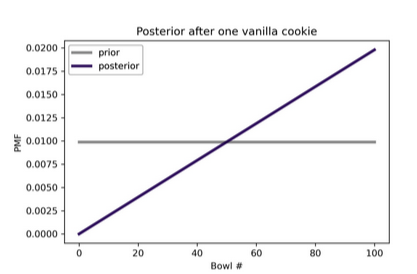

Now suppose we put the cookie back, draw again from the same bowl, and get
another vanilla cookie. Here’s the update after the second cookie:


In [28]:
posterior2 = posterior1 * likelihood_vanilla
posterior2.normalize()
posterior2.head()

,probs
0,0.000000
1,0.000003
2,0.000012


In [29]:
posterior2.tail()

,probs
98,0.028385
99,0.028967
100,0.029555


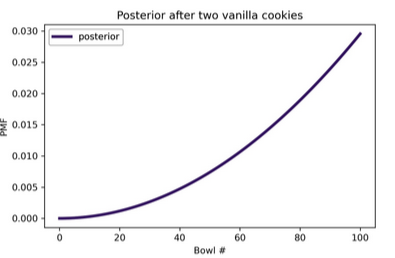

After two vanilla cookies, the high-numbered bowls have the highest posterior
probabilities because they contain the most vanilla cookies; the low-numbered
bowls have the lowest probabilities.

But suppose we draw again and get a chocolate cookie. Here’s the update:

In [21]:
likelihood_chocolate = 1 - hypos/100
posterior3 = posterior2 * likelihood_chocolate
posterior3.normalize()
posterior3.head()

,probs
0,0.000000
1,0.000012
2,0.000047


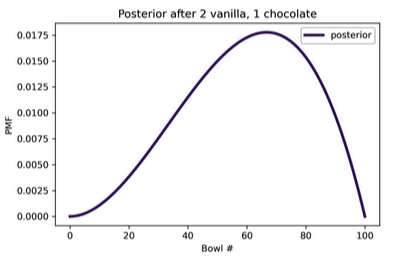

Now Bowl 100 has been eliminated because it contains no chocolate cookies.
But the high-numbered bowls are still more likely than the low-numbered bowls,
because we have seen more vanilla cookies than chocolate.
- In fact, the peak of the posterior distribution is at Bowl 67, which corresponds to
the fraction of vanilla cookies in the data we’ve observed, .
- The quantity with the highest posterior probability is called the __MAP: 
 “maximum a posteori probability”__,

To compute the MAP, we can use the Series method idxmax:


In [22]:
posterior3.idxmax()

np.int64(67)

In [26]:
posterior1.idxmax()

np.int64(100)

In [32]:
posterior2.idxmax()

np.int64(100)

Pmf provides a more memorable name for the same thing:

In [33]:
posterior3.max_prob()

np.int64(67)

### The Dice Problem
In the previous chapter we solved the Dice Problem using a Bayes table. Here’s
the statement of the problem:
_Suppose I have a box with a 6-sided die, an 8-sided die, and a 12-sided die.
I choose one of the dice at random, roll it, and report that the outcome is a 1.
What is the probability that I chose the 6-sided die?_

Let’s solve it using a Pmf. I’ll use integers to represent the hypotheses:

In [2]:
hypos = [6, 8, 12]
prior = Pmf(1, hypos)
prior.normalize()
prior



,probs
6,0.333333
8,0.333333
12,0.333333


As in the previous example, the prior probability gets broadcast across the
hypotheses. The Pmf object has two attributes:
- qs contains the quantities in the distribution;
- ps contains the corresponding probabilities.

In [3]:
prior.qs

array([ 6,  8, 12])

In [4]:
prior.ps

array([0.33333333, 0.33333333, 0.33333333])

Here’s the likelihood of the data for each
hypothesis:

In [5]:
likelihood1 = 1/6, 1/8, 1/12

In [6]:
posterior = prior * likelihood1
posterior.normalize()
posterior

,probs
6,0.444444
8,0.333333
12,0.222222


The posterior probability for the 6-sided die is 4/9

Now suppose I roll the same die again and get a 7. 
- Here are the likelihoods: 0, 1/8, 1/12
- The likelihood for the 6-sided die is 0 because it is not possible to get a 7 on a 6-
sided die. 
- The other two likelihoods are the same as in the previous update.

Here’s the update:

In [7]:
likelihood2 = 0, 1/8, 1/12

posterior *= likelihood2
posterior.normalize()
posterior

,probs
6,0.000000
8,0.692308
12,0.307692


After rolling a 1 and a 7, the posterior probability of the 8-sided die is about
69%.

### Updating Dice

The following function is a more general version of the update in the previous
section:

In [8]:
def update_dice(pmf, data): # Update pmf based on new data.
    hypos = pmf.qs
    likelihood = 1 / hypos
    impossible = (data > hypos)
    likelihood[impossible] = 0
    pmf *= likelihood
    pmf.normalize()

- The first parameter is a Pmf that represents the possible dice and their
probabilities. 
- The second parameter is the outcome of rolling a die.
- The first line selects quantities from the Pmf that represent the hypotheses. Since
the hypotheses are integers, we can use them to compute the likelihoods. In
general, if there are n sides on the die, the probability of any possible outcome is
1/n.
- We have to check for impossible outcomes! If the outcome exceeds the
hypothetical number of sides on the die, the probability of that outcome is 0.
- impossible is a Boolean Series that is True for each impossible outcome.
We use it as an index into likelihood to set the corresponding probabilities to 0
- Finally, we multiply pmf by the likelihoods and normalize.



Here’s how we can use this function to compute the updates in the previous
section. We start with a fresh copy of the prior distribution:

In [9]:
pmf = prior.copy()
pmf

,probs
6,0.333333
8,0.333333
12,0.333333


And use update_dice to do the updates:

In [10]:
update_dice(pmf, 1)
update_dice(pmf, 7)
pmf

,probs
6,0.000000
8,0.692308
12,0.307692
